In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('Data.npy')

In [3]:
data.shape

(2000, 3)

In [6]:
X = data[:,:-1]
Y = data[:, -1]

In [8]:
print(X.shape)

(2000, 2)


In [52]:
test_point = np.array([2,-1]) 

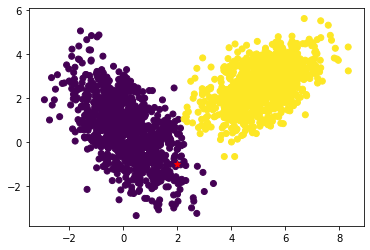

In [53]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(test_point[0],test_point[1],color='red',marker='*')
plt.show()


In [54]:
def dist(a1,a2):
    return np.sum((a1-a2)**2)**.5

def knn(X,Y,test_point,k=5):
    
    d = []
    m = X.shape[0]
    for i in range(m):
        dis = dist(test_point,X[i])
        d.append((dis,Y[i]))
    
    d.sort()
    d = np.array(d[:k])[:,1]
    uniq,freq = np.unique(d,return_counts=True)
    idx = np.argmax(freq)
    label = uniq[idx]
    
    return int(label)

In [55]:
pred = knn(X,Y,test_point)
print(pred)

0


## Load the MNIST Dataset (Handwritten Digits Data)

In [56]:
import pandas as pd


In [83]:
data = pd.read_csv('../Dataset/MNIST-1/train.csv',header=None)
testdata = pd.read_csv('../Dataset/MNIST-1/test.csv',header=None)

In [74]:
data.shape

(20000, 785)

In [75]:
data.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [76]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [77]:
data = data.values
print(type(data))

<class 'numpy.ndarray'>


In [78]:
X = data[:,:-1]
Y = data[:,-1]

print(X.shape)
print(Y.shape)

(20000, 784)
(20000,)


In [79]:
def drawImg(x):
    img = x.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

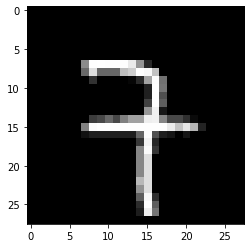

7


In [82]:
drawImg(X[0])
print(Y[0])

In [84]:
test_data = testdata.values
test_data.shape

(10000, 785)

In [85]:
Xt = test_data[:,:-1]
Yt = test_data[:,-1]

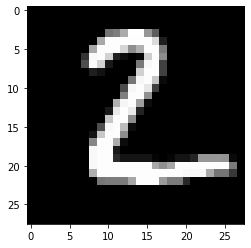

In [88]:
drawImg(Xt[1])

In [90]:
knn(X,Y,Xt[1])

2

In [92]:
np.unique(Yt,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [95]:
outputs = []
for i in range(100):
    pred = knn(X,Y,Xt[i])
    outputs.append(pred)
    if i%10==0:
        print(i,end='\r')
    
outputs = np.array(outputs)

In [96]:
print(outputs)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9]


In [100]:
acc = np.sum(outputs==Yt[:100])/100.0

In [101]:
print(acc)

0.99
